# Mentor Training - FAI
LO:
- Understand how to preprocess a dataset for machine learning using pandas

We will be using a Google Play Store dataset to practice preprocessing.

In [176]:
# import your libraries!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# read from the csv file
df = pd.read_csv("googleplaystore.csv")

## Preprocessing data

Suppose we had a dataset that had 10k android apps from the Google Play store. This dataset had rows such as the name of the app, number of reviews, average rating, number of installs etc.

Let's say we were going to train a decision tree, to predict an average rating that an app would have, based on the number of reviews and the number of installs (we won't actually do this in today's session).

Before we can train the decision tree, the data needs to be preprocessed and prepared.

There are 2 main things to consider when preprocessing data:
- Are there any null values?
- Are there any non-integer values?

Let's check for null values first. 

In [178]:
# we check for null values by using the isnull function
# we sum it up to see how many null values are present. This is important
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We can see above that ratings has over a 1000 null values, and there are a few null values in the app current version.

There are 2 ways to approach fixing null values:
- Remove the rows that have null values
- Fill in the cells with null values, based on averages of the other cells

Removing rows is ideal for larger datasets (of at least 10k or above). However if you have a smaller dataset, removing rows would reduce the data that the decision tree has to train and test, which can reduce accuracy on testing data.

Filling in cells with averages of other cells works well for smaller datasets as it means that all the rows can be used in the training and testing process. However, this can mean that data is inconsistent as the null values are simply averages which might not be accurate.

So let's try both methods:

First, let's delete every row with a null value.

In [179]:
# dropna() is a pandas function that removes missing values.
# The inplace = True means that valid entries in the csv are kept in the variable df
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

So above, we were able to remove the values that had null values. Let's check how many rows we have in the DataFrame.

In [180]:
len(df)

9360

We still have a lot of rows that should be enough for the decision tree.

Let's try the second method.

In [181]:
# read from the csv file again
df = pd.read_csv("googleplaystore.csv")
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Null values in the Rating heading will be assigned a mean based on the other values under Ratings. 

In [182]:
# here we are getting the value counts for each value in Ratings
# we don't need this to calculate the mean, but it's a useful function to use
df["Rating"].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [183]:
df["Rating"].mean()

4.193338315362443

In [184]:
# we change the Ratings column in df to the mean of that column
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [185]:
df["Type"] = df["Type"].fillna("Free")
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

For the other columns we will use the mode. This is because these types of data are non-integer (which you can't get a mean for). We will find the largest value in the column and assign the null values that value. This works well for non-integer values.

In [186]:
# find the value counts for each content rating
df["Content Rating"].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [187]:
# Assign the column the mode: Everyone
df["Content Rating"] = df["Content Rating"].fillna("Everyone")
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

I would like you to try and do the same for the next two columns (Current Ver and Android Ver). Check that you have done this correctly by using the isnull() function.

In [188]:
# put your code here for current ver

In [189]:
# put your code here for android ver

Congrats! You now know how to remove null values from a dataset. This will prove to be very useful in your coursework.

## Linear Regression

# Explaination

For our linear regression, we will be using the diabetes dataset that is bundled with sklearn. The x values are the independent values and the y values are the dependent - the x values will be used to get our targets, the y values. For this example, we will only take one feature for x (for example, 1 feature would be heartrate, 2 features would be heartrate and blood pressure - it is just the set of values). We can also visualise this data.

Text(0, 0.5, 'y')

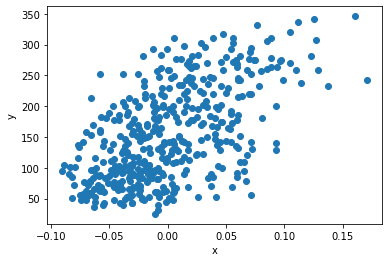

In [193]:
from sklearn import datasets
from matplotlib import pyplot as plt
diabetes_x, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_x = diabetes_x[:, np.newaxis, 2] # this takes the second index in the second dimension, whilst keeping it a 2d array. The data will look like [[1], [2], [3], ...]

plt.scatter(diabetes_x, diabetes_y) # plot the x and y values in a scatter plot - we can see any trends by doing this
plt.xlabel("x")
plt.ylabel("y")

We will also split our data into a test and training dataset. We use sklearn's built-in function for this. `test_size` sets the percentage of the dataset to use as test data and `shuffle` enables randomisation of the data.

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes_x, diabetes_y, test_size=0.2, shuffle=True)

We can now train the linear regression model - this uses sklearn. 

In [195]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

We can show the coefficient and the intercept. Note there is only one coefficient here - this loops back to us only using a single-feature (one independent variable) dataset for this model. Generally, the formula for linear regression can be considered `y = f1*x1 + f2*x2 + f3*x3... + fn*xn + c` where `f` is the coefficient for a feature, `x` is the x-value for the feature (so `f1` is the coefficient for feature 1 and `x1` is an x-value for feature 1), and `c` is the sum of all biases (intercept). That means that here, with our single feature model, this formula is `y=f1 + c`. You may notice this is just `y = mx + c` - the equation of a straight line with `m` being the gradient and `c` being the y-intercept.

You may see a more formal definition of linear regression as `y=b0 + b1*x1 + ... + bn*xn + e`. This is the same equation with `b0` being the sum of all biases, and `e` being the error of our model. To explain `e` you can consider a single datapoint in our training data, x and y. For a typical, non-perfect model if you plug the x value(s) into the above equation then you will (usually) not get the exact value of `y`. This is because our model is generalised to our entire dataset, and so unless the datapoint lies exactly where our model has generalised the predicted `y` value will always be `e` distance from the true `y` value.

In [196]:
print("Model coefficient(s): {}".format(model.coef_)) # note that this is an array but it only has one value for this dataset
print("Model intercept: {}".format(model.intercept_))

Model coefficient(s): [937.00070297]
Model intercept: 150.90553447705963


We can visualise this model onto our training data. The above explaination of linear regression should help you understand line 2 in detail.

Text(0, 0.5, 'y')

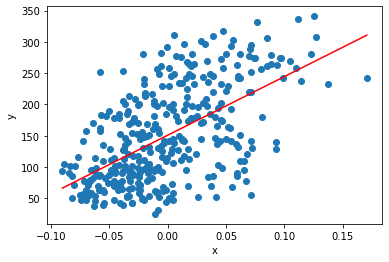

In [197]:
x_values = np.linspace(x_train.min(), x_train.max(), 100) # creates a list of 100 evenly spaced numbers between the min and max values of x_train
y_values = model.intercept_ + model.coef_[0] * x_values # applies our single-feature model coefficient and bias onto the x values - can be considered to be y = mx + c
plt.scatter(x_train, y_train) # plot our training data
plt.plot(x_values, y_values, color="red") # plot our model line
plt.xlabel("x")
plt.ylabel("y")

We can test the accuracy of our model with our test data and the Mean Squared Error (MSE) metric. We can also compute the Root Mean Squared Error (RMSE).

Mathematically, MSE is `(1/n) * Σ(truth – predicted)2` where `n` is the number of datapoints, and `truth` and `predicted` are the "real" and the model-produced values respectively. We can explain this formula as the sum of the squared distance between the real and the predicted value for each datapoint, then divided by the number of datapoints.
MSE alone can be difficult to interpret as it is the average of the squared distances - so it will be on a different scale to the true values. RMSE solves this by simply being the root of the MSE.

During training of a linear regression model MSE or RMSE is used as a loss function - the fit function will try to optimise the model around the goal of minimising the output of the loss function.

In [198]:
from sklearn.metrics import mean_squared_error
y_predict = model.predict(x_test)
error = mean_squared_error(y_test, y_predict)
print(f"MSE: {error:.3f}")
print(f"RMSE: {np.sqrt(error):.3f}")

MSE: 3606.534
RMSE: 60.054


# Exercise

The below function generates a dataset (variables x and y) for you to build a linear regression model from:

In [199]:
# you do not need to understand this, only use the produced x and y
count = 300
x = np.linspace(0, 10, count)
y = np.random.normal(loc=x, scale=1.5)
x = x.reshape((count, 1))

Visualise the above dataset (see if it has a correlation - will it work with linear regression?), split it into train and test datasets, train a linear regression model, and compute the Root Mean Squared Error.

In [200]:
# visualise here

In [201]:
# split and train here

In [202]:
# compute the RMSE here